### Initialize with float

In [1]:
%%capture

import numpy as np
import perfplot
from numba import njit

val = 42.

def tile(n):
    return np.tile(val, n)

@njit
def fill(n):
    a = np.empty(n)
    a.fill(val)
    return a

@njit
def colon(n):
    a = np.empty(n)
    a[:] = val
    return a

@njit
def full(n):
    return np.full(n, val)


@njit
def ones_times(n):
    return np.ones(n) * val


def list(n):
    return np.array(n * [val])


out = perfplot.bench(
    setup=lambda n: n,
    kernels=[
        tile, fill.py_func, fill, colon.py_func, colon, full.py_func,
        full, ones_times.py_func, ones_times, list
    ],
    n_range=[2**k for k in range(20)],
    logx=True,
    logy=True,
    xlabel='len(a)',
    )

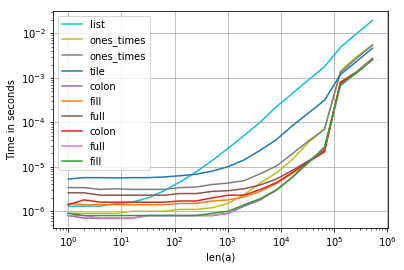

In [2]:
out.show()

### Initialize with np.nan#

We import ``def fill()`` from a file as it is more realistic to write a wrapper for the two-liner instead of making the code more unreadable.

In [3]:
%%file temp.py

from numba import njit
import numpy as np


@njit
def fill(n, val):
    a = np.empty(n)
    a.fill(val)
    
    return a


Writing temp.py


In [4]:
%%capture

import numpy as np
import perfplot
from numba import njit

val = np.nan

def tile(n):
    return np.tile(val, n)

def fill(n):
    # The reason for the import statement is that fill is faster but using
    # a two-liner decreases readibility. Of course, imports are only once
    # per-file and the average runtime may be faster than np.full again.
    from temp import fill
    
    return fill(n, val)

@njit
def full(n):
    return np.full(n, val)


@njit
def ones_times(n):
    return np.ones(n) * val


def list(n):
    return np.array(n * [val])

from functools import partial
numpy_nan_allclose = partial(np.allclose, equal_nan=True)


out = perfplot.bench(
    setup=lambda n: n,
    kernels=[
        tile, fill, full.py_func, full, ones_times.py_func, ones_times,
        list
    ],
    n_range=[2**k for k in range(20)],
    logx=True,
    logy=True,
    xlabel='len(a)',
    equality_check=numpy_nan_allclose
    )

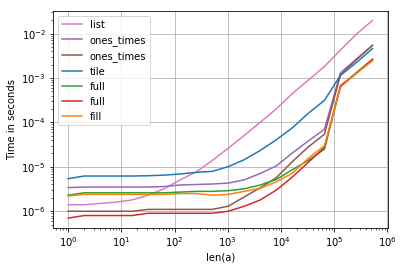

In [5]:
out.show()